In [4]:
'''
Data Collecting / Cleaning
Data Exploration
Data Visualization
Machine Learning
Communication
'''
''' 
1/ ID is irrelevant
2/ experience cannot be negative
3/ 
'''

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as mp
#univariate
from pandas import read_csv
from matplotlib import pyplot
from numpy import math

#multivariate
from pandas.plotting import scatter_matrix

import zipfile

from pandas.plotting import scatter_matrix
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [5]:
# Loading Dataset

def load_dataset():
    url = "Visa_For_Lisa_Loan_Modelling.csv"
    dataset = pd.read_csv(url)
    
    return dataset

dataframe = load_dataset()


def clean_dataset(dataset):
    del dataset['ID']
    #print(dataset["Age"].unique())
    #print(dataset["Experience"].unique())  #-1 -2 -3
    dataset['Experience'] = dataset['Experience'].abs()
    #print(dataset["Experience"].unique())
    #print(dataset["Income"].unique())
    #print(dataset["ZIP Code"].unique())
    #print(dataset["Family"].unique()) # family - is a number of members
    #print(dataset["CCAvg"].unique())
    #print(dataset["Education"].unique())
    #print(dataset["Mortgage"].unique())
    #print(dataset["Personal Loan"].unique())
    #print(dataset["Securities Account"].unique())
    #print(dataset["CD Account"].unique())
    #print(dataset["Online"].unique())
    #print(dataset["CreditCard"].unique())
    
    
    
    # clean experience for negative values
    

    return dataset

clean_dataset(dataframe)


def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print()
    print("First 10 rows of dataset:")
    print(dataset.head(30))
    print()
    print("Statistical summary:")
    print(dataset.describe())
    print(dataset.dtypes)

print_summarize_dataset(dataframe)



Dataset dimension:
(5000, 13)

First 10 rows of dataset:
    Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0    25           1      49     91107       4    1.6          1         0   
1    45          19      34     90089       3    1.5          1         0   
2    39          15      11     94720       1    1.0          1         0   
3    35           9     100     94112       1    2.7          2         0   
4    35           8      45     91330       4    1.0          2         0   
5    37          13      29     92121       4    0.4          2       155   
6    53          27      72     91711       2    1.5          2         0   
7    50          24      22     93943       1    0.3          3         0   
8    35          10      81     90089       3    0.6          2       104   
9    34           9     180     93023       1    8.9          3         0   
10   65          39     105     94710       4    2.4          3         0   
11   29           5


Histograms


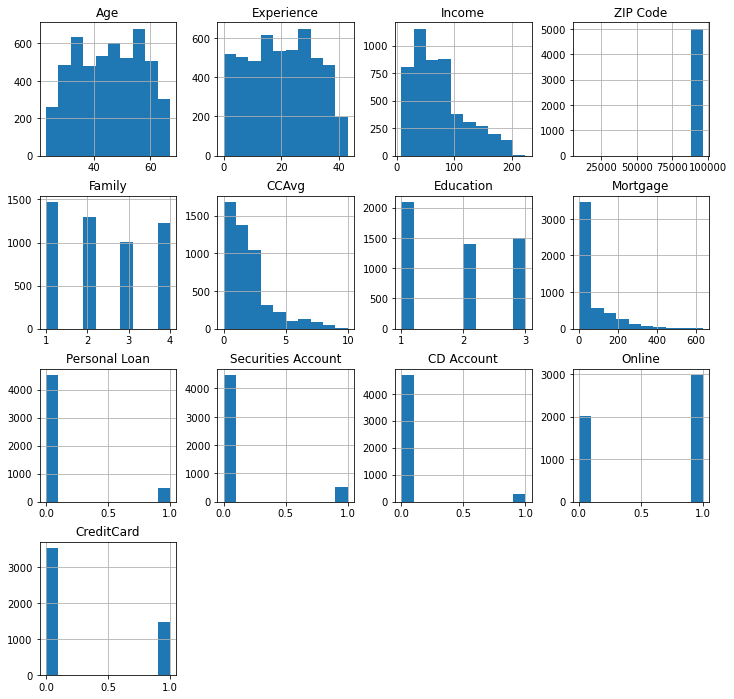

Income                0.002385
Personal Loan         0.002802
Online                0.004210
CCAvg                 0.006689
Mortgage              0.007231
Age                   0.007681
ZIP Code              0.007691
Experience            0.008851
Education             0.011014
Family                0.011588
Securities Account    0.015028
CD Account            0.278644
CreditCard            1.000000
dtype: float64


In [7]:

def print_histograms(dataset):
    print()
    print("Histograms")
    dataset.hist(figsize=(12, 12))
    plt.show()

print_histograms(dataframe)

def compute_correlations_matrix(dataset):
    corrM = dataset.corr(method = 'pearson')
    sorted_mat = corrM.unstack().abs().sort_values()
    
    return sorted_mat

correlations = compute_correlations_matrix(dataframe)
print(correlations["CreditCard"])



In [17]:
def x_y_value(dataset):
    X = dataset.drop(columns = 'CreditCard')
    y = dataset['CreditCard']
    return X, y

X, y = x_y_value(dataframe)

    

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




''' 
def pred(dataset):
    reg = linear_model.LinearRegression()
    reg.fit(dataset[['CD Account', 'Securities Account', 'Family', 'Educatioxn', 'ZIP Code', 'Age', 'Mortgage']], dataset.CreditCard)
    print(reg.coef_)
    print(reg.intercept_)

pred(dataframe)

'''

" \ndef pred(dataset):\n    reg = linear_model.LinearRegression()\n    reg.fit(dataset[['CD Account', 'Securities Account', 'Family', 'Educatioxn', 'ZIP Code', 'Age', 'Mortgage']], dataset.CreditCard)\n    print(reg.coef_)\n    print(reg.intercept_)\n\npred(dataframe)\n\n"

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [20]:
def scalling(dataset):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scalling(dataframe)
#print(X_train_scaled)
print(X_test_scaled)


[[-1.51805623 -1.5953678   0.80451857 ... -0.34537466 -0.25772643
   0.81649658]
 [ 1.10570147  1.03928121  0.84746287 ... -0.34537466 -0.25772643
  -1.22474487]
 [ 0.75586711  0.68799468  0.74010212 ... -0.34537466 -0.25772643
   0.81649658]
 ...
 [ 0.49349134  0.51235141  2.26462487 ...  2.89540636 -0.25772643
   0.81649658]
 [-0.55601174 -0.62932983 -0.33350546 ... -0.34537466 -0.25772643
   0.81649658]
 [ 0.8433257   0.77581631  1.89959829 ... -0.34537466 -0.25772643
   0.81649658]]


In [22]:
def pred_train(dataset):
    log_reg = linear_model.LinearRegression()
    log_reg.fit(X_train_scaled, y_train)
    
    y_pred = log_reg.predict(X_train_scaled)
    acc = log_reg.score(X_train_scaled, y_train)
    return y_train, acc

y_train_pred, acc = pred_train(dataframe)
print(y_train_pred)
print(acc)


NameError: name 'linear_model' is not defined

In [ ]:
def pred_train(dataset):
    log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)
    y_train_pred = log_reg.predict(X_train_scaled)
    acc = log_reg.score(X_train_scaled, y_train)
    return y_train, acc

y_train_pred, acc = pred_train(dataframe)
print(y_train_pred)
print(acc)

In [43]:
def pred_test(dataset):
    log_reg = LogisticRegression(random_state = 0).fit(X_test_scaled, y_test)
    y_test_pred = log_reg.predict(X_test_scaled)
    acc1 = log_reg.score(X_test_scaled, y_test)
    return y_test, acc1

y_test_pred, acc1 = pred_test(dataframe)
#print(y_test_pred)
print(acc1)

0.752


In [45]:
# Linear Regression

def pred_train(dataset):
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    log_reg = LinearRegression.fit(X_train_scaled, y_train)
    y_train_pred = log_reg.predict(X_train_scaled)
    acc = log_reg.score(X_train_scaled, y_train)
    return y_train, acc

y_train_pred, acc = pred_train(dataframe)
print(y_train_pred)
print(acc)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
# Linear Regression

def pred_test(dataset):
    log_reg = LogisticRegression(random_state = 0).fit(X_test_scaled, y_test)
    y_test_pred = log_reg.predict(X_test_scaled)
    acc1 = log_reg.score(X_test_scaled, y_test)
    return y_test, acc1

y_test_pred, acc1 = pred_test(dataframe)
#print(y_test_pred)
print(acc1)

In [ ]:
def pred(dataset):
    dep_var = 'CreditCard'
    #indep_var = dataset.columns.tolist()
    #indep_var = ['CD Account', 'Securities Account', 'Family', 'Education']
    indep_var = ['Family', 'Education']
    #indep_var.remove(dep_var)
    #print(indep_var)
    X = dataset[indep_var].values
    y = dataset[dep_var].values
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    
    #print(X_train[:10])
    
    y_pred = regressor.predict(X_test)
    math.sqrt(mean_squared_error(y_test, y_pred))
    
    print(math.sqrt(mean_squared_error(y_test, y_pred)))
    
    print(r2_score(y_test, y_pred))
    
    plt.figure(figsize = (15,10))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    
    
pred(dataframe)

In [7]:
def print_results(dataset):
    

IndentationError: expected an indented block (623651604.py, line 2)

In [6]:
from sklearn import linear_model

def prediction(dataset):
    X = dataset[['CD Account', 'Securities Account']]
    y = dataset['CreditCard']

    regr = linear_model.LinearRegression()
    regr.fit(X, y)

    predictedCO2 = regr.predict([[1, 0]])

    print(predictedCO2)

prediction(dataframe)

''' 
def two_var_plot(dataset): #function for plotting two variables graphs
    v2 = 'CreditCard'
    ax = plt.gca()
    
    #df = pd.DataFrame(columns=['RM', v2])
    
    dataset.plot( x = 'CD Account' , y = v2, ax = ax )
    #dataset.plot( x = 'Securities Account' , y = v2 , ax = ax )
    
    
    
    
    #df = pd.DataFrame(columns=['LSTAT', v2])
    ax1 = dataset.plot.scatter(x='Securities Account', y=v2, c='Blue') 
    mp.show()
    
    #df = pd.DataFrame(columns=['AGE', v2])
    ax1 = dataset.plot.scatter(x='Family', y=v2, c='Blue') 
    mp.show()
    
    #df = pd.DataFrame(columns=['CRIM', v2])
    ax1 = dataset.plot.scatter(x='Education', y=v2, c='Blue') 
    mp.show()
    
two_var_plot(dataframe)
'''



''' 
def print_scatter_matrix(dataset):
    print("Scatter Matrix")
    scatter_matrix(dataset, figsize=(15, 15))
    plt.show()

print_scatter_matrix(dataframe)
'''

[0.87804516]


C:\Users\n.alpeissov\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


' \ndef print_scatter_matrix(dataset):\n    print("Scatter Matrix")\n    scatter_matrix(dataset, figsize=(15, 15))\n    plt.show()\n\nprint_scatter_matrix(dataframe)\n'

In [ ]:
'''
correlation of creditcard and other parameters by abs values
CD Account
Securities Account
Family 
Education 
Experience
ZIP Code
Age
Mortgage
CCAvg 

Online 
Personal Loan 
Income  
'''

In [ ]:
''' 
of its deposit customers to become personal loan customers (while retaining them as depositors). 
In short, they want to upsell customers to purchase more banking products from Galaxy Bank.
'''

In [ ]:
'''
https://www.w3schools.com/python/python_ml_multiple_regression.asp
https://datatofish.com/multiple-linear-regression-python/
https://www.analyticsvidhya.com/blog/2022/03/multiple-linear-regression-using-python/
https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/
https://www.geeksforgeeks.org/ml-multiple-linear-regression-using-python/

'''

# New Try

In [1]:
results = model.fit()

print(results.summary())

NameError: name 'model' is not defined

In [4]:
import pandas as pd
# Loading Dataset

def load_dataset():
    url = "Visa_For_Lisa_Loan_Modelling.csv"
    dataset = pd.read_csv(url)
    
    return dataset

dataframe = load_dataset()


In [5]:
def x_y_value(dataset):
    X = dataset.drop(columns = 'CreditCard')
    y = dataset['CreditCard']
    return X, y

X, y = x_y_value(dataframe)

In [2]:
from sklearn.linear_model import LinearRegression


In [11]:
def linear(dataset):
    reg = linear_model.Linear
    
    
linear(dataframe)

AttributeError: 'DataFrame' object has no attribute 'get_dummies'